# Time for spatial stuff!


![funnyDK](https://i.imgur.com/0fAvDQy.jpeg)

Today, we get to play with spatial data. While we can do all sorts of weird stuff with spatial data, I have made this introduction somewhat basic. If there is a time to learn the basics before jumping into the weirder stuff, it's when using spatial data. It's super important to understand what a shapefile is and how it works before we start to manipulate data. 

I will go over a few different things during this lecture. Among them are:

- What even is shapefiles?
- What is the difference between Pandas and Geopandas?
- Can all data be geographical data?
- How to make cool maps
- How to make even cooler maps

A word of warning; when playing with geo-data it is normal to use waaaaay too much time trouble-shooting different issues like coordinate systems, weird shapes and why England is located south of Africa on your map - it's part of the charm :D

First for the imports and remember, it puts the imports at the top or it gets the hose again.

![Bill](https://www.advocate.com/sites/default/files/2018/12/07/buffalo-billx750.jpg)

In [1]:
!pip install geopandas # geopandas is not installed by default on Colab - this installs it
!pip install contextily # contextily is not installed by default on Colab - this installs it
!pip install pygeos # pygeos optional dependency for geopandas (which we will use)
!pip install adjustText # Adjusting text in maps

In [2]:
!wget "https://github.com/CALDISS-AAU/sdsphd21/raw/master/datasets/shapefiles.zip" # Downloads data files
!unzip shapefiles.zip # Unpacks data files

--2021-11-23 13:44:17--  https://github.com/CALDISS-AAU/sdsphd21/raw/master/datasets/shapefiles.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CALDISS-AAU/sdsphd21/master/datasets/shapefiles.zip [following]
--2021-11-23 13:44:17--  https://raw.githubusercontent.com/CALDISS-AAU/sdsphd21/master/datasets/shapefiles.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32728265 (31M) [application/zip]
Saving to: ‘shapefiles.zip.4’

shapefiles.zip.4    100%[===================>]  31.21M   188MB/s    in 0.2s    

2021-11-23 13:44:18 (188 MB/s) - ‘shapefiles.zip.4’ saved [32728265/32728265]

Archive

In [3]:
import geopandas as gdp
import pandas as pd
import matplotlib.pyplot as plt
from pyproj import Proj
import contextily as ctx
from geopandas import GeoDataFrame
from shapely.geometry import Point
import adjustText as aT

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.0-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


First, we find our data. Data today consists primarily of Danish municipalities and all the fun stuff we can add to that. First, we load our shapefile and then I tell you about what this stuff is and why it's cool.

One cool thing about Geopandas is that we don't have to learn a new syntax - it's based on the Pandas framework......... okay, that's a lie. It IS based on Pandas but a lot of stuff is different. The idea is cool, though.

In [4]:
municipalities = gdp.read_file("KOMMUNE.shp")
municipalities.head()

,FEAT_ID,FEAT_KODE,FEAT_TYPE,FEAT_STTXT,GEOM_STTXT,DAGI_ID,AREAL,REGIONKODE,REGIONNAVN,GYLDIG_FRA,GYLDIG_TIL,KOMKODE,KOMNAVN,DQ_SPECIFK,DQ_STATEM,DQ_DESCR,DQ_PROCESS,DQ_RESPONS,DQ_POSACPL,DQ_POSACLV,TIMEOF_CRE,TIMEOF_PUB,TIMEOF_REV,TIMEOF_EXP,geometry
0,149673,6310,Kommune,vedtaget,endelig,389146,24010.29,1085,Region Sjælland,2019-01-01,None,0350,Lejre,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2019-01-01,2019-01-07,None,2020-11-07,"POLYGON Z ((675926.480 6172129.210 -999.000, 6..."
1,149674,6310,Kommune,vedtaget,endelig,389146,24010.29,1085,Region Sjælland,2019-01-01,None,0350,Lejre,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2019-01-01,2019-01-07,None,2020-11-07,"POLYGON Z ((687523.890 6176458.950 -999.000, 6..."
2,149675,6310,Kommune,vedtaget,endelig,389146,24010.29,1085,Region Sjælland,2019-01-01,None,0350,Lejre,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2019-01-01,2019-01-07,None,2020-11-07,"POLYGON Z ((689361.510 6173523.720 -999.000, 6..."
3,149676,6310,Kommune,vedtaget,endelig,389146,24010.29,1085,Region Sjælland,2019-01-01,None,0350,Lejre,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2019-01-01,2019-01-07,None,2020-11-07,"POLYGON Z ((689210.210 6174589.210 -999.000, 6..."
4,149647,6310,Kommune,vedtaget,endelig,389130,25096.56,1084,Region Hovedstaden,2018-01-22,None,0250,Frederikssund,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2018-01-22,2018-01-22,None,2020-11-07,"POLYGON Z ((679613.660 6187623.990 -999.000, 6..."


So we can explore the geographical data the way we normally do - when working with geography, this table can sometimes be refered to as an "attribute table" but it is just that; a normal table that is connected to geographical data.

The full set of columns is:

In [5]:
print(municipalities.columns)

Index(['FEAT_ID', 'FEAT_KODE', 'FEAT_TYPE', 'FEAT_STTXT', 'GEOM_STTXT',
       'DAGI_ID', 'AREAL', 'REGIONKODE', 'REGIONNAVN', 'GYLDIG_FRA',
       'GYLDIG_TIL', 'KOMKODE', 'KOMNAVN', 'DQ_SPECIFK', 'DQ_STATEM',
       'DQ_DESCR', 'DQ_PROCESS', 'DQ_RESPONS', 'DQ_POSACPL', 'DQ_POSACLV',
       'TIMEOF_CRE', 'TIMEOF_PUB', 'TIMEOF_REV', 'TIMEOF_EXP', 'geometry'],
      dtype='object')


Right, but where is the maps, right? This all just looks like a normal Pandas table.
![moar](https://reposti.com/i/m/uL.jpg)

Combined with matplotlib, we can play around with creating a plot from the shapefile. The basic syntax is:

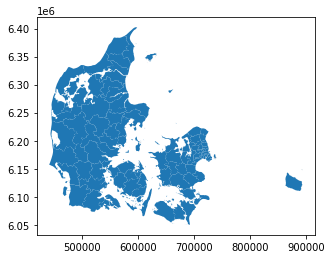

In [6]:
municipalities.plot()

Or maybe just the borders?

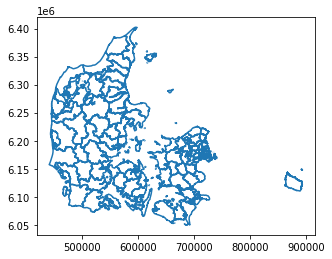

In [7]:
municipalities.boundary.plot()

Of course, this is not all. BEHOLD! The many features of map-plots! One option you can use countless hours playing with (or maybe that's just me) is the `cmap` function. Cmap has soooo many pretty colours and there is no limit to how many people has developed different color-schemes. To start out relaxing, try playing around with the below code - change cmap to some other styles. A small selection is this:

![cmap](https://matplotlib.org/3.1.0/_images/sphx_glr_colormaps_007.png)

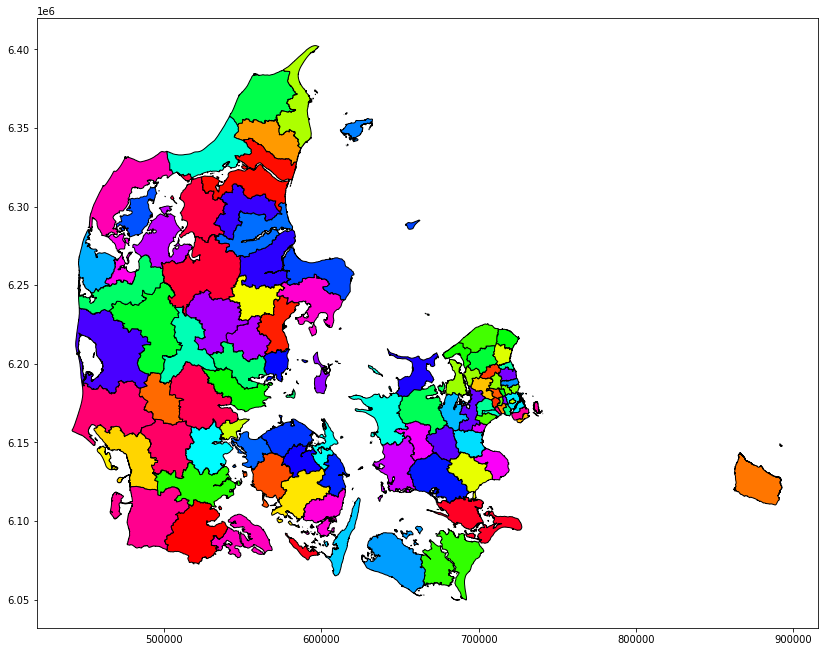

In [8]:
municipalities.plot(cmap='hsv', edgecolor='black', column='KOMNAVN', figsize=(14,14))

Right. So know we know stuff about how Denmark looks and we know how many municipalities there are... or we would know if we counted the different areas. I can tell you, that we have 98 (99 if we count Christiansø - even though Christiansø is not part of a municipality). Let's check if that is the case:

In [9]:
municipalities.info(verbose=False)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Columns: 25 entries, FEAT_ID to geometry
dtypes: float64(1), geometry(1), int64(3), object(20)
memory usage: 307.7+ KB


Well... shit. Our range-index tells us that we have 1575 observations but we know (because I told you) that we have 98 municipalities. What's up with that? Let's check the first 50 observations of municipality name (KOMNAVN):

In [10]:
print(municipalities.loc[1:50, ['KOMNAVN']])

          KOMNAVN
1           Lejre
2           Lejre
3           Lejre
4   Frederikssund
5   Frederikssund
6      Fredericia
7      Fredericia
8      Fredericia
9          Lemvig
10         Lemvig
11   Guldborgsund
12       Slagelse
13       Slagelse
14       Slagelse
15       Slagelse
16    Vordingborg
17    Vordingborg
18    Vordingborg
19    Vordingborg
20  Frederikssund
21  Frederikssund
22         Lemvig
23        Thisted
24        Thisted
25        Thisted
26        Thisted
27        Thisted
28        Thisted
29       Slagelse
30       Slagelse
31       Slagelse
32       Slagelse
33       Slagelse
34       Slagelse
35       Slagelse
36       Slagelse
37    Vordingborg
38    Vordingborg
39    Vordingborg
40  Frederikssund
41  Frederikssund
42  Frederikssund
43        Thisted
44         Lemvig
45    Christiansø
46    Christiansø
47       Slagelse
48       Slagelse
49       Slagelse
50       Slagelse


Right, so we have multiple observations of each municipality. Why is that the case? Because we have something called multipart features. Think of it like this:

![dissolve](https://desktop.arcgis.com/en/arcmap/10.3/tools/coverage-toolbox/GUID-E49A133D-83D0-4217-8319-DCAAD61F3157-web.gif)

So how do we fix it? One way of thinking is just to drop parts of the table and just keep one of each. That would solve it in the table but not in the geography. Each entry corresponds to a specific part of the geography so if we delete stuff just in the table, we delete parts of our map as well. We need those parts!

Instead, we can use a tool called *dissolve*. Dissolve aggregates the feature of interest so that all the different parts of the geography that shares a value/name in a single column will be one big one. We do it like this:

In [11]:
municipalities["label"]=municipalities["KOMNAVN"]
mun = municipalities.dissolve(by='KOMNAVN')

Now, someone clever would probably say: *"Well, does it matter that there are more of one municipality than another? It looks the same"*. And you are completely right. Up untill we realize that statistics doesn't work that way. If we add data, we don't add data to *parts* of the municipality so, for example, summing over municipalities is going to be weird. Right, now that's out of the way, let's check again: 

In [12]:
mun.info(verbose=False)

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 99 entries, Aabenraa to Ærø
Columns: 25 entries, geometry to label
dtypes: float64(1), geometry(1), int64(3), object(20)
memory usage: 22.6+ KB


Yay, we have... 99? Damn you, Christiansø! Oh well... 99 it is. It's going bye-bye later, but we allow it to live for now.

### Small exercise!
Try creating a new dissolve where you dissolve by the column *"regionnavn"* instead. When that works, try mapping it. What did we do?

## More data!

Let's check out some other data I have. This data is from Statistics Denmark and is a somewhat bleak statistic containing municipality name, how many people that lives there (alt2016), how many people that are commited to a mental health facility, and the ratio between number of people and number of hospitalizations (psykratio). The data looks like this:

In [13]:
mun_data=pd.read_excel("https://github.com/CALDISS-AAU/sdsphd21/raw/master/datasets/spatialdata.xlsx")
mun_data.head()

,omr,alt2016,psyk2016,psykratio
0,København,64735,1326,0.020484
1,Frederiksberg,12364,258,0.020867
2,Dragør,1746,54,0.030928
3,Tårnby,5614,158,0.028144
4,Albertslund,3686,76,0.020619


Now we need to figure out how this stuff works. We have a geographical layer and now we have a dataframe - we have loads of stuff to consider. First, we need to check what out *key* is. The key is the information that checks if stuff belongs together or not. Normally, this is the option `on=`. Since our geotable and pandas table does not have the same name for municipality name, we instead specify `left_on` and `right_on`. `how` tells Python to which dataset we need to add the information. I want to add information on municipalities from the excel-data, so I go with left (the first thing I specify). `validate` is technically optional, but I would consider it... not optional. I know that there are only one municipality present in my geography for each name and I only want to add one value for each. `validate='one_to_one` makes sure that Python throws an error if there are multiple instances of municipality name in either of my dataframes.

In [14]:
mun_fun = mun.merge(mun_data, left_on='KOMNAVN', right_on="omr", how='left', validate="one_to_one")
mun_fun.head()

,geometry,FEAT_ID,FEAT_KODE,FEAT_TYPE,FEAT_STTXT,GEOM_STTXT,DAGI_ID,AREAL,REGIONKODE,REGIONNAVN,GYLDIG_FRA,GYLDIG_TIL,KOMKODE,DQ_SPECIFK,DQ_STATEM,DQ_DESCR,DQ_PROCESS,DQ_RESPONS,DQ_POSACPL,DQ_POSACLV,TIMEOF_CRE,TIMEOF_PUB,TIMEOF_REV,TIMEOF_EXP,label,omr,alt2016,psyk2016,psykratio
0,MULTIPOLYGON Z (((532301.030 6079222.270 -999....,91071,6310,Kommune,vedtaget,endelig,389169,94061.45,1083,Region Syddanmark,2020-06-09,None,0580,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2020-06-09,2020-06-09,None,2020-11-07,Aabenraa,Aabenraa,7016.0,109.0,0.015536
1,MULTIPOLYGON Z (((577123.530 6306761.880 -999....,149920,6310,Kommune,vedtaget,endelig,389206,113800.07,1081,Region Nordjylland,2018-11-07,None,0851,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2018-11-07,2018-11-07,None,2020-11-07,Aalborg,Aalborg,18343.0,340.0,0.018536
2,MULTIPOLYGON Z (((575502.150 6222138.030 -999....,150803,6310,Kommune,vedtaget,endelig,389194,47115.23,1082,Region Midtjylland,2018-06-28,None,0751,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2018-06-28,2018-06-28,None,2020-11-07,Aarhus,Aarhus,28614.0,472.0,0.016495
3,"POLYGON Z ((711377.280 6178342.550 -999.000, 7...",108994,6310,Kommune,vedtaget,endelig,389112,2343.66,1084,Region Hovedstaden,2020-08-27,None,0165,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2020-08-27,2020-08-27,None,2020-11-07,Albertslund,Albertslund,3686.0,76.0,0.020619
4,"POLYGON Z ((701094.650 6192181.200 -999.000, 7...",151461,6310,Kommune,vedtaget,endelig,389121,6742.52,1084,Region Hovedstaden,2018-01-22,None,0201,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2018-01-22,2018-01-22,None,2020-11-07,Allerød,Allerød,2902.0,27.0,0.009304


Right. So we added our psychiatric data - now for something new; choropleth maps. What are they, you ask? It's a map that changes colors as a value changes within a predefined column. Weird name, cool functionality:

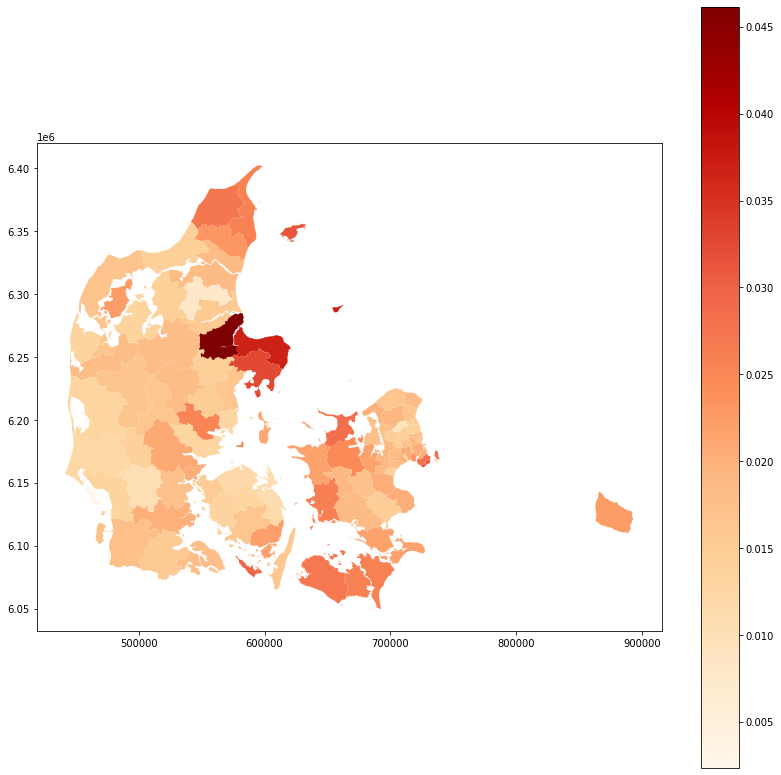

In [15]:
mun_fun.plot(column="psykratio", legend="True", figsize=(14,14), cmap='OrRd')

So, social science! Let's have fun with a super relevant hypothesis! What if pretty nature results in less mental health problems? Lucky for us, Denmark has an official route where the nature is VERY pretty called *Marguerit-ruten* or in English *The Daisy Route*. Let's grab the data and have a look:

In [16]:
rute=gdp.read_file("Marguerit_2016_UTM32_euref89.shp")

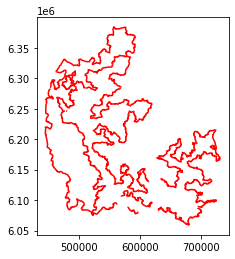

In [17]:
rute.plot(color="r")

Look! How pretty! Now, let's just plop that route on top of the other map:

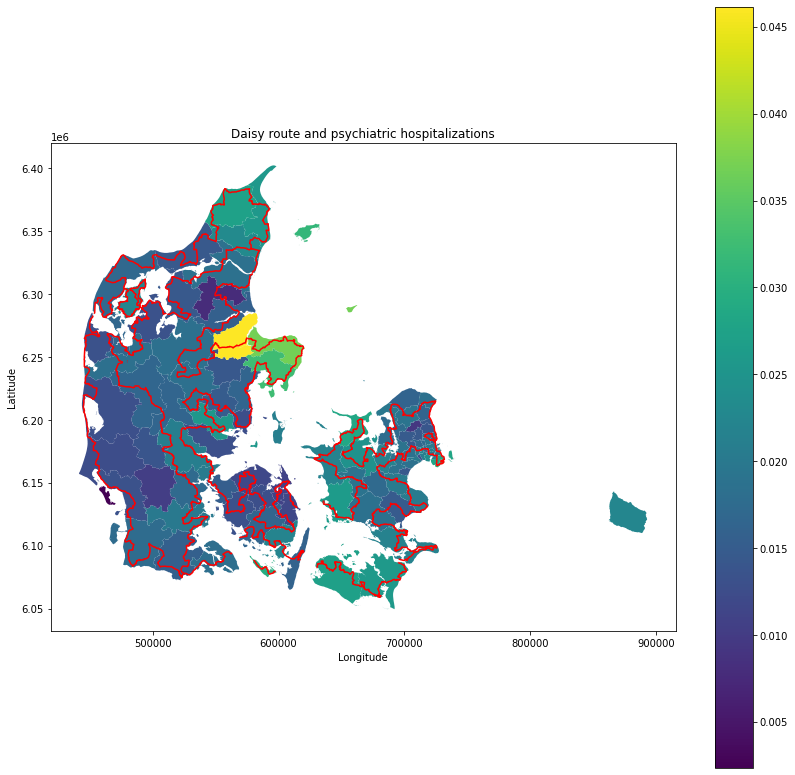

In [18]:
fig, ax =plt.subplots(1,1, figsize=(14,14))
plt.title('Daisy route and psychiatric hospitalizations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
mun_fun.plot(column="psykratio", ax=ax, legend=True, label='Ratio of pshychiatric hospitalizations')
rute.plot(ax=ax, color="red", label="Route")

Well... shit. My idea didn't really hold water. Randers (the yellow municipality) has the route straight through it but it is still the clear "winner". Damn it... if one listens to the rumors, there are other things wrong with Randers that could explain what's going on though :)

## So, what do we know about churches?

Okay, I admit that I don't know much about the history and importance of Danish churches. My alter is my monitor. But! Churhes makes for a great thing to map! Also, churches are single points and not polygons. Let's spin it up:

In [19]:
churches=gdp.read_file("Points.shp")
churches.head()

,Name,FolderPath,SymbolID,AltMode,Base,Snippet,PopupInfo,HasLabel,LabelID,geometry
0,Birkelund Kirke,kirker.kmz/Hovedstaden/Albertslund Kommune,0,-1,0.0,None,None,-1,0,POINT Z (12.34613 55.66500 0.00000)
1,Herstedvester,kirker.kmz/Hovedstaden/Albertslund Kommune,0,-1,0.0,None,None,-1,0,POINT Z (12.33889 55.67721 0.00000)
2,Herstedøster,kirker.kmz/Hovedstaden/Albertslund Kommune,0,-1,0.0,None,None,-1,0,POINT Z (12.37092 55.68487 0.00000)
3,Holsbjerg,kirker.kmz/Hovedstaden/Albertslund Kommune,0,-1,0.0,None,None,-1,0,POINT Z (12.34874 55.65972 0.00000)
4,Opstandelseskirken,kirker.kmz/Hovedstaden/Albertslund Kommune,0,-1,0.0,None,None,-1,0,POINT Z (12.35805 55.65572 0.00000)


And have a look:

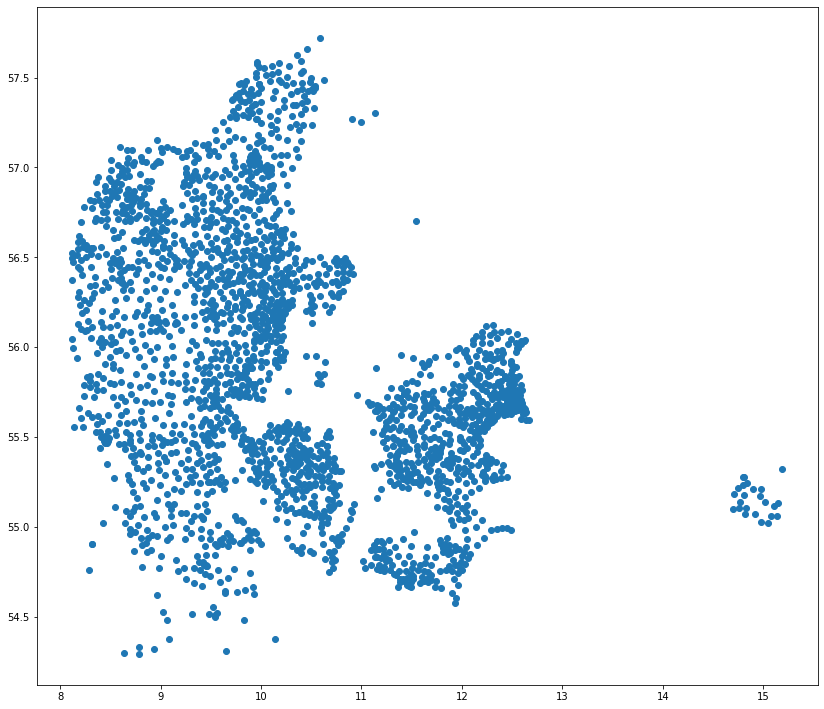

In [20]:
churches.plot(figsize=(14,14))

Nice. So let's try to plot the points on top our municipalities. I could tell you that there is a analytical point but right now there isn't... I need it to make a point. Map time:

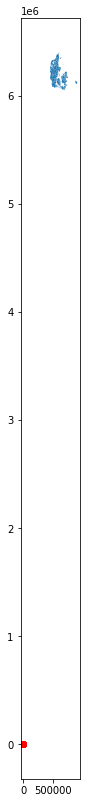

In [21]:
fig, ax =plt.subplots(1,1, figsize=(14,14))
mun_fun.plot(ax=ax)
churches.plot(ax=ax, color="red")

BY ZEUS! What are the churches doing all the way down there and WHY is Denmark all the way up there!? The answer is short but the box it opens is of the Pandora-type; coordinate systems. Coordinate systems are infinite; most are based on a predefined set of Y and X axes but no one agrees on where 0 is... or anything else. So, we have 1 gazillion different systems and everyone has their own preference. The best argument for varying systems is a more clever use of 0. Instead of the system starting in 3827748737, it could start in 0 and move on from there. Thus, we need to figure out what is going on with our layers. We do this by:

In [22]:
churches.crs

<Compound CRS: EPSG:9707>
Name: WGS 84 + EGM96 height
Axis Info [ellipsoidal|vertical]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
- [up]: Gravity-related height (metre)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
Sub CRS:
- WGS 84
- EGM96 height

In [23]:
mun_fun.crs

<Projected CRS: PROJCS["UTM32_EUREF89",GEOGCS["GCS_EUREF89",DATUM[ ...>
Name: UTM32_EUREF89
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: D_EUREF89
- Ellipsoid: Geodetic_Reference_System_of_1980
- Prime Meridian: Greenwich

What did we learn? Well, it looks like our churches are in something called WGS84 and our municipalities are in UTM32_EUREF89. When working with Danish data, UTM32 is almost always the system used. UTM-zones look like this:

![UTM](https://www.xmswiki.com/images/8/88/UTM_world_no_Image_Map.jpg)

And we are smack in the middle of Zone 32 North. Someone, at some point, decided that everything Danish needs to be in that system and so it was.

However! We can fix it. Instead of fixing one to fit the other, we move it to what is called the *Spherical Mercator* system - it makes sense a little later on. Geopandas works with a common reference to all the different systems called epsg (European Petroleum Survey Group - yeah I know, it doesn't have much to do with petroloum but at some point, it did). If we want to know what other systems are in epsg, we can look here: https://epsg.io/

In [24]:
mun_fun = mun_fun.to_crs(epsg=3857)
chu=churches.to_crs(epsg=3857)

Let's see if we actually fixed it:

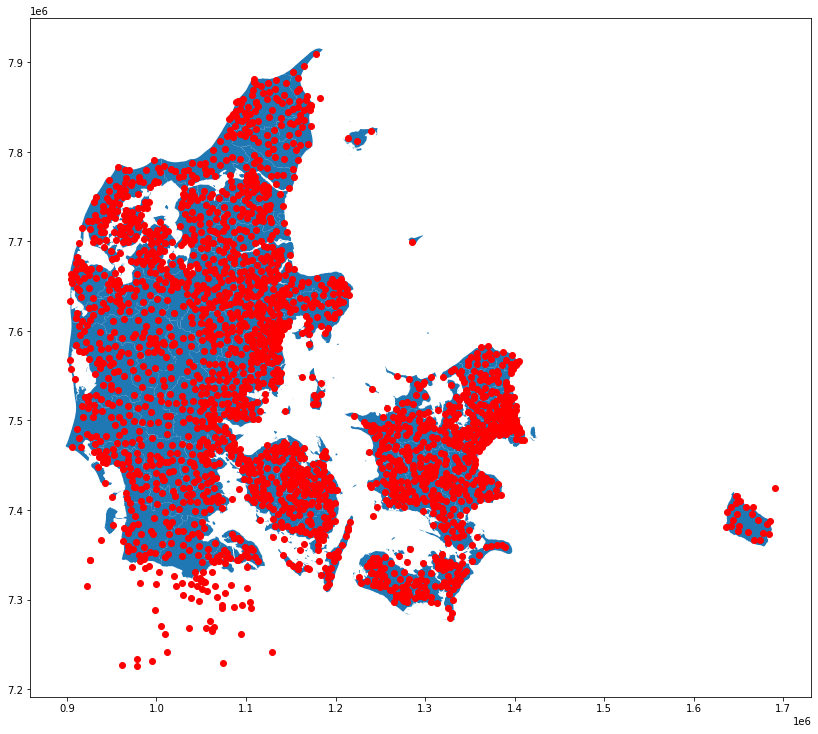

In [25]:
fig, ax =plt.subplots(1,1, figsize=(14,14))
mun_fun.plot(ax=ax)
chu.plot(ax=ax, color="red")

Now we have access to a map where points are located within each municipality... if we disregard those weird ones out in the middle of the ocean. The ones further south is Danish churches in Germany. We disregard those as well. 

Okay, so we *see* where the churches are but... we still have a problem because my very undefined question requires that we know how many churches are in each municipality. How do we solve this? Spatial join to the resque!

A spatial join requires only to things (besides from actually being placed at the same place); `how` and `op` (operation).

`how` is the same as a normal join; what do we want to add the join to
`op` is much harder. The most commonly used are `intersect`, `within` or `contains`. `Intersect` means that stuff will be joined if it touches each other. `Within` means that only instances where the first specified dataset is within the second dataset is joined. `Contains` is the opposite of within, if the first dataset contains parts of the second. In our case, our churches are within municipalities so we specify `within`:

In [26]:
chu_in_mun = gdp.sjoin(chu, mun_fun, how="right", op='within')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


If we get an error message here, it's because we are using different coordinate systems - we don't like that very much!

In [27]:
chu_in_mun.head()

,index_left,Name,FolderPath,SymbolID,AltMode,Base,Snippet,PopupInfo,HasLabel,LabelID,geometry,FEAT_ID,FEAT_KODE,FEAT_TYPE,FEAT_STTXT,GEOM_STTXT,DAGI_ID,AREAL,REGIONKODE,REGIONNAVN,GYLDIG_FRA,GYLDIG_TIL,KOMKODE,DQ_SPECIFK,DQ_STATEM,DQ_DESCR,DQ_PROCESS,DQ_RESPONS,DQ_POSACPL,DQ_POSACLV,TIMEOF_CRE,TIMEOF_PUB,TIMEOF_REV,TIMEOF_EXP,label,omr,alt2016,psyk2016,psykratio
0,2398,Bov,kirker.kmz/Syddanmark/Aabenraa Komm.,0,-1,0.0,None,None,-1,0,"MULTIPOLYGON (((1057890.448 7334557.555, 10578...",91071,6310,Kommune,vedtaget,endelig,389169,94061.45,1083,Region Syddanmark,2020-06-09,None,0580,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2020-06-09,2020-06-09,None,2020-11-07,Aabenraa,Aabenraa,7016.0,109.0,0.015536
0,2410,Kollund,kirker.kmz/Syddanmark/Aabenraa Komm.,0,-1,0.0,None,None,-1,0,"MULTIPOLYGON (((1057890.448 7334557.555, 10578...",91071,6310,Kommune,vedtaget,endelig,389169,94061.45,1083,Region Syddanmark,2020-06-09,None,0580,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2020-06-09,2020-06-09,None,2020-11-07,Aabenraa,Aabenraa,7016.0,109.0,0.015536
0,2407,Holbøl,kirker.kmz/Syddanmark/Aabenraa Komm.,0,-1,0.0,None,None,-1,0,"MULTIPOLYGON (((1057890.448 7334557.555, 10578...",91071,6310,Kommune,vedtaget,endelig,389169,94061.45,1083,Region Syddanmark,2020-06-09,None,0580,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2020-06-09,2020-06-09,None,2020-11-07,Aabenraa,Aabenraa,7016.0,109.0,0.015536
0,2403,Felsted,kirker.kmz/Syddanmark/Aabenraa Komm.,0,-1,0.0,None,None,-1,0,"MULTIPOLYGON (((1057890.448 7334557.555, 10578...",91071,6310,Kommune,vedtaget,endelig,389169,94061.45,1083,Region Syddanmark,2020-06-09,None,0580,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2020-06-09,2020-06-09,None,2020-11-07,Aabenraa,Aabenraa,7016.0,109.0,0.015536
0,2399,Burkal,kirker.kmz/Syddanmark/Aabenraa Komm.,0,-1,0.0,None,None,-1,0,"MULTIPOLYGON (((1057890.448 7334557.555, 10578...",91071,6310,Kommune,vedtaget,endelig,389169,94061.45,1083,Region Syddanmark,2020-06-09,None,0580,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2020-06-09,2020-06-09,None,2020-11-07,Aabenraa,Aabenraa,7016.0,109.0,0.015536


Let's check if we actually did stuff correctly by counting churches within municipalities:

In [28]:
print (chu_in_mun.groupby('omr')['Name'].nunique())

omr
Aabenraa           23
Aalborg            67
Aarhus             64
Albertslund         5
Allerød             5
                   ..
Vejle              47
Vesthimmerlands    40
Viborg             74
Vordingborg        27
Ærø                 7
Name: Name, Length: 98, dtype: int64


And what is in the dataset now:

In [29]:
print(chu_in_mun.columns)

Index(['index_left', 'Name', 'FolderPath', 'SymbolID', 'AltMode', 'Base',
       'Snippet', 'PopupInfo', 'HasLabel', 'LabelID', 'geometry', 'FEAT_ID',
       'FEAT_KODE', 'FEAT_TYPE', 'FEAT_STTXT', 'GEOM_STTXT', 'DAGI_ID',
       'AREAL', 'REGIONKODE', 'REGIONNAVN', 'GYLDIG_FRA', 'GYLDIG_TIL',
       'KOMKODE', 'DQ_SPECIFK', 'DQ_STATEM', 'DQ_DESCR', 'DQ_PROCESS',
       'DQ_RESPONS', 'DQ_POSACPL', 'DQ_POSACLV', 'TIMEOF_CRE', 'TIMEOF_PUB',
       'TIMEOF_REV', 'TIMEOF_EXP', 'label', 'omr', 'alt2016', 'psyk2016',
       'psykratio'],
      dtype='object')


Let's create a column that holds information about the number of churches within each municipality:

In [30]:
chu_in_mun['numchurch'] = chu_in_mun['Name'].groupby(chu_in_mun['omr']).transform('count')

And let's map it out. Number of churches within each municipality with a nice color-coded legend:

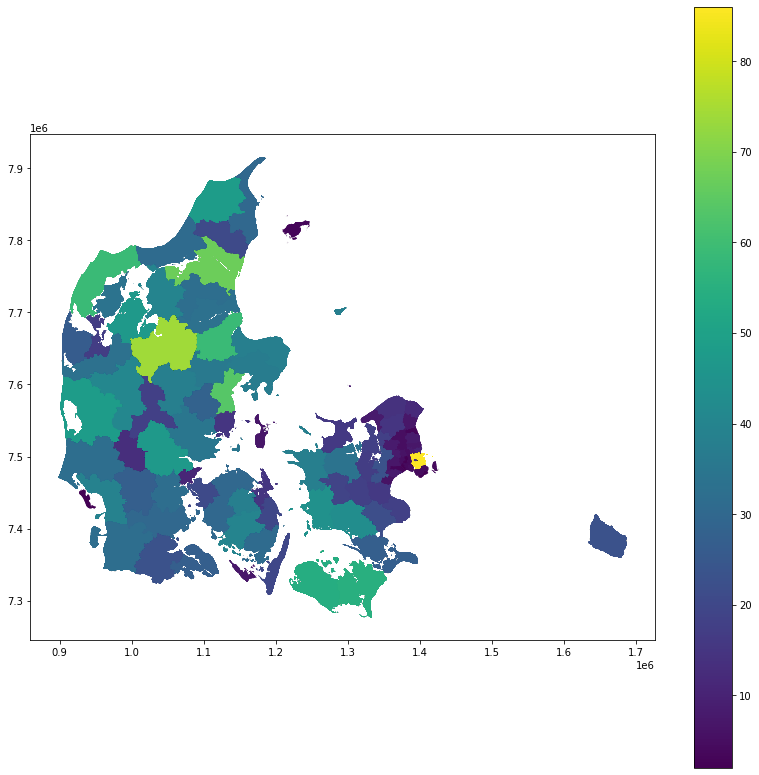

In [31]:
chu_in_mun.plot(column="numchurch", legend="True", figsize=(14,14))

Now, we can also make it pretty by adding a basemap. Basemaps are basically just background pictures that makes everything look nice. We use contextily for this by going:

In [32]:
mun = mun.to_crs(epsg=3857)

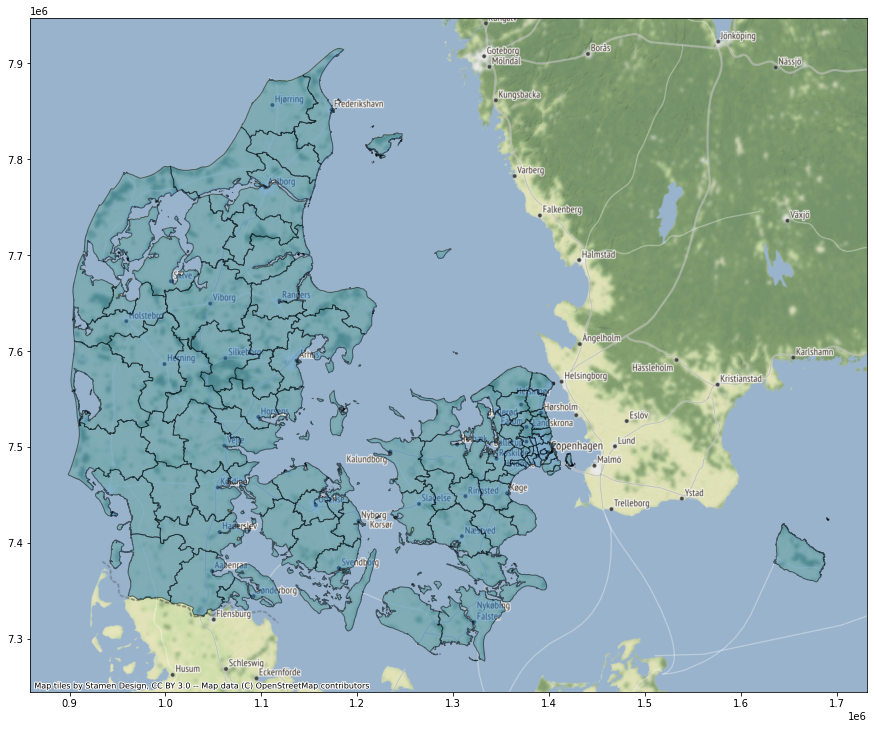

In [33]:
ax = mun.plot(figsize=(15, 15), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

Contextily has looooads of fun stuff to play with. If you run this line:

In [34]:
ctx.providers.keys()

dict_keys(['OpenStreetMap', 'OpenSeaMap', 'OPNVKarte', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Stadia', 'Thunderforest', 'CyclOSM', 'Hydda', 'Jawg', 'MapBox', 'MapTiler', 'Stamen', 'TomTom', 'Esri', 'OpenWeatherMap', 'HERE', 'HEREv3', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'GeoportailFrance', 'OneMapSG', 'USGS', 'WaymarkedTrails', 'OpenAIP', 'OpenSnowMap', 'AzureMaps', 'Gaode', 'Strava'])

In [35]:
ctx.providers.OpenStreetMap.keys()

dict_keys(['Mapnik', 'DE', 'CH', 'France', 'HOT', 'BZH', 'BlackAndWhite'])

We can see all the different basemaps included. Have fun playing with them to create just the right feel - it can take some time. 

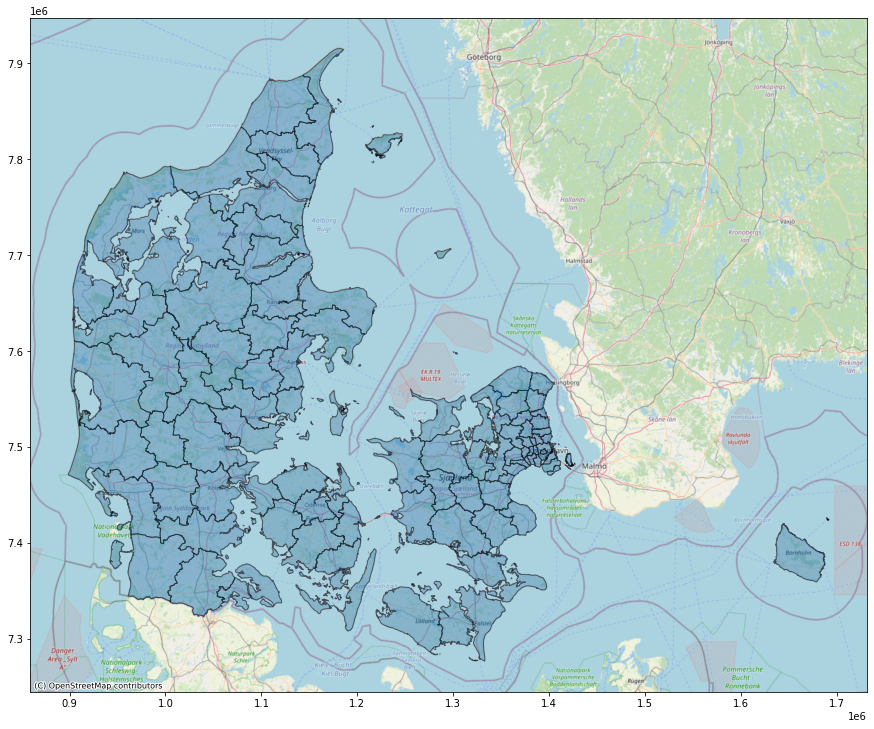

In [36]:
ax = mun.plot(figsize=(15, 15), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

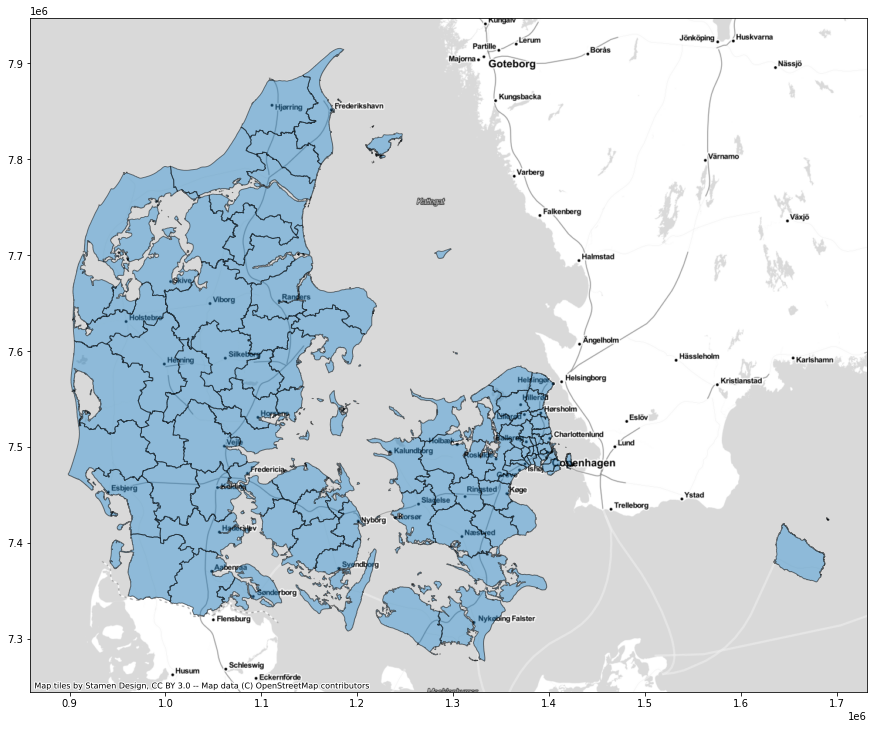

In [37]:
ax = mun.plot(figsize=(15, 15), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

In [38]:
mun_subset=mun.loc[mun['REGIONNAVN'].isin(['Region Midtjylland', 'Region Hovedstaden', 'Region Sjælland'])]
real_denmark = mun.loc[mun["REGIONNAVN"] == "Region Nordjylland"]

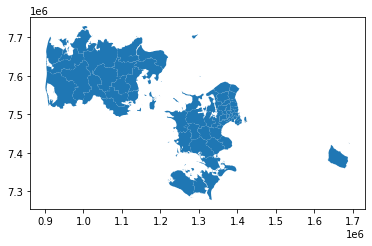

In [39]:
mun_subset.plot()

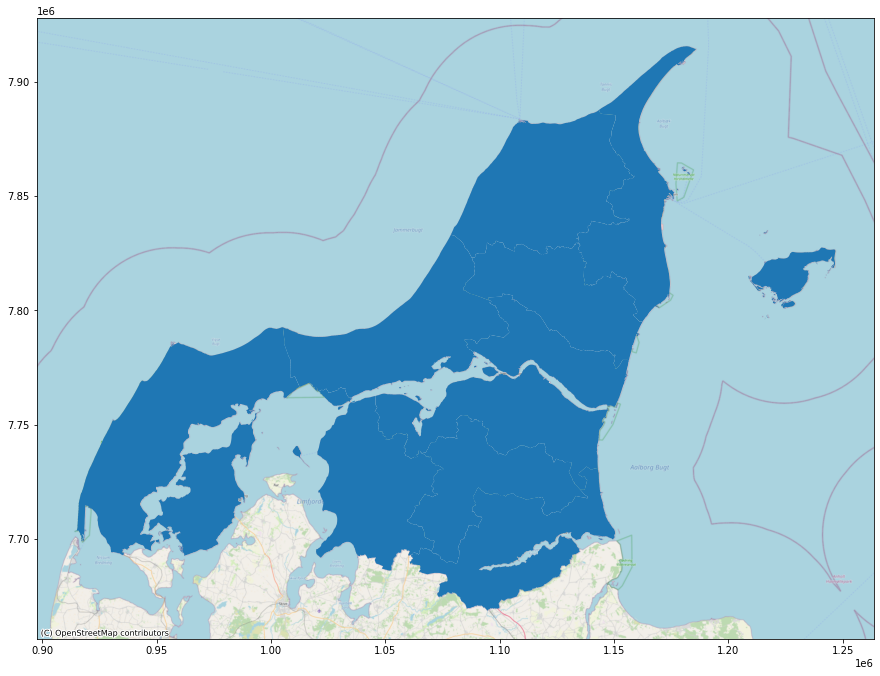

In [40]:
ax = real_denmark.plot(figsize=(15, 15))
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

In [41]:
real_denmark["center"] = real_denmark["geometry"].centroid
rd_points = real_denmark.copy()
rd_points.set_geometry("center", inplace = True)

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [42]:
rd_points.head()

,geometry,FEAT_ID,FEAT_KODE,FEAT_TYPE,FEAT_STTXT,GEOM_STTXT,DAGI_ID,AREAL,REGIONKODE,REGIONNAVN,GYLDIG_FRA,GYLDIG_TIL,KOMKODE,DQ_SPECIFK,DQ_STATEM,DQ_DESCR,DQ_PROCESS,DQ_RESPONS,DQ_POSACPL,DQ_POSACLV,TIMEOF_CRE,TIMEOF_PUB,TIMEOF_REV,TIMEOF_EXP,label,center
KOMNAVN,,,,,,,,,,,,,,,,,,,,,,,,,,
Aalborg,"MULTIPOLYGON (((1142822.823 7739328.807, 11428...",149920,6310,Kommune,vedtaget,endelig,389206,113800.07,1081,Region Nordjylland,2018-11-07,None,0851,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2018-11-07,2018-11-07,None,2020-11-07,Aalborg,POINT (1109110.925 7762831.558)
Brønderslev,"POLYGON ((1105842.083 7806465.395, 1105838.500...",149867,6310,Kommune,vedtaget,endelig,389199,63337.19,1081,Region Nordjylland,2018-11-07,None,0810,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2018-11-07,2018-11-07,None,2020-11-07,Brønderslev,POINT (1126837.398 7806456.379)
Frederikshavn,"MULTIPOLYGON (((1173324.374 7806453.862, 11733...",150075,6310,Kommune,vedtaget,endelig,389200,65168.20,1081,Region Nordjylland,2019-07-01,None,0813,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2019-07-01,2019-07-01,None,2020-11-07,Frederikshavn,POINT (1158790.613 7846828.470)
Hjørring,"POLYGON ((1131989.466 7827683.015, 1131977.597...",149210,6310,Kommune,vedtaget,endelig,389201,92660.72,1081,Region Nordjylland,2018-01-22,None,0860,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2018-01-22,2018-01-22,None,2020-11-07,Hjørring,POINT (1119838.051 7853944.848)
Jammerbugt,"MULTIPOLYGON (((1020018.472 7765072.427, 10199...",150559,6310,Kommune,vedtaget,endelig,389205,86636.53,1081,Region Nordjylland,2018-01-22,None,0849,DS_DAGI_v1.0_REF,Digitaliseret pba. referencemateriale,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2018-01-22,2018-01-22,None,2020-11-07,Jammerbugt,POINT (1057986.024 7789304.756)


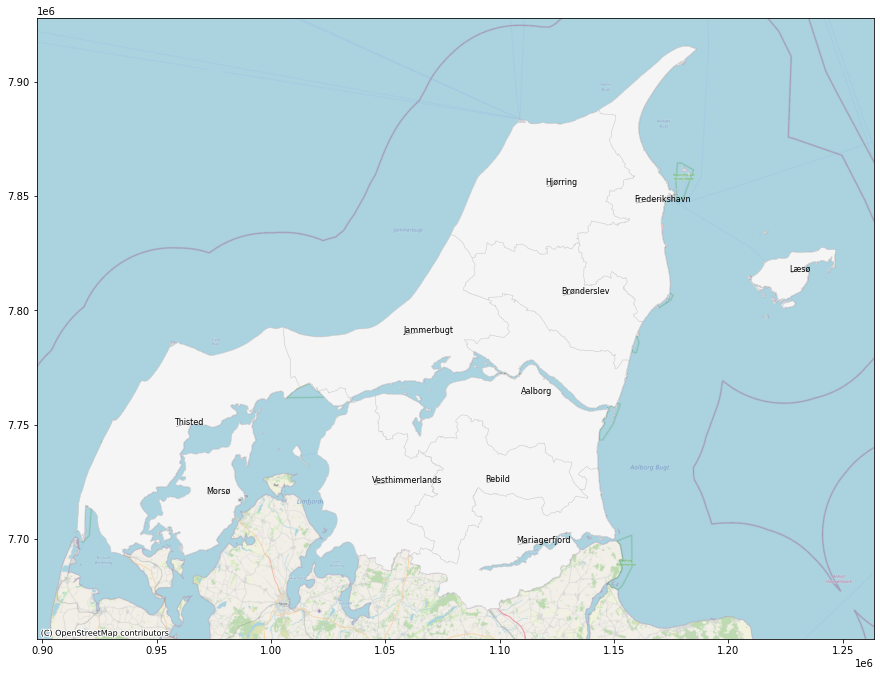

In [43]:
ax = real_denmark.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
texts = []

for x, y, label in zip(rd_points.geometry.x, rd_points.geometry.y, rd_points["label"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
               arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Lets have some fun!

Try to go here:
https://ec.europa.eu/eurostat/data/database

And look for statistics that are on NUTS level 2

Then go grab this data: https://github.com/CALDISS-AAU/sdsphd21/raw/master/datasets/NUTS_RG_20M_2021_3035_LEVL_2.shp.zip



In [44]:
!wget "https://github.com/CALDISS-AAU/sdsphd21/raw/master/datasets/NUTS_RG_20M_2021_3035_LEVL_2.shp.zip"
!unzip NUTS_RG_20M_2021_3035_LEVL_2.shp.zip

--2021-11-23 13:45:56--  https://github.com/CALDISS-AAU/sdsphd21/raw/master/datasets/NUTS_RG_20M_2021_3035_LEVL_2.shp.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CALDISS-AAU/sdsphd21/master/datasets/NUTS_RG_20M_2021_3035_LEVL_2.shp.zip [following]
--2021-11-23 13:45:56--  https://raw.githubusercontent.com/CALDISS-AAU/sdsphd21/master/datasets/NUTS_RG_20M_2021_3035_LEVL_2.shp.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159016 (155K) [application/zip]
Saving to: ‘NUTS_RG_20M_2021_3035_LEVL_2.shp.zip.2’

NUTS_RG_20M_2021_30 100%[===================>] 155.29K  --.-KB/s    in 0.01s   


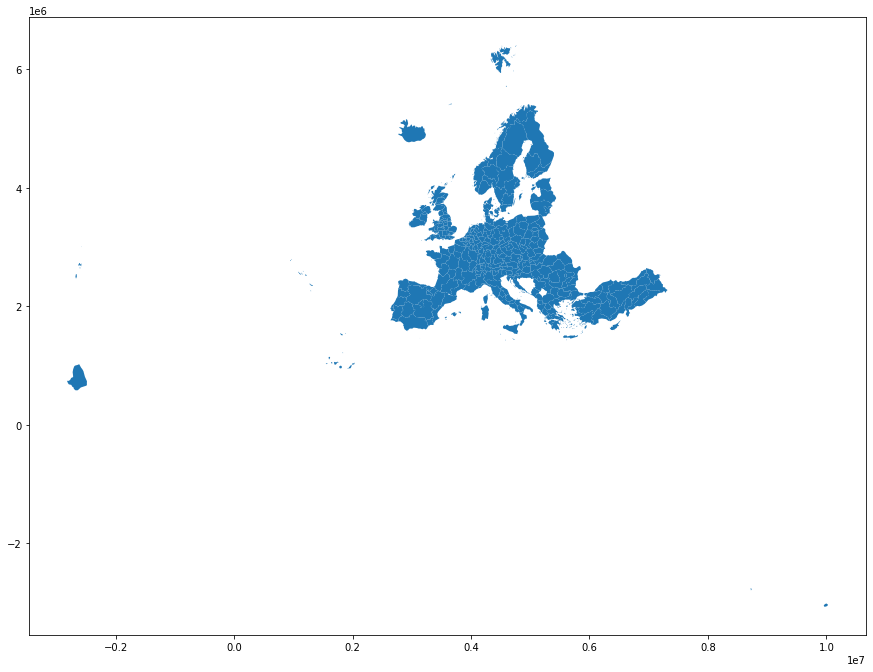

In [45]:
nuts = gdp.read_file("NUTS_RG_20M_2021_3035_LEVL_2.shp")
nuts.plot(figsize=(15,15))

Try to do something cool with the data and map some stuff. Remember; the layer is NUTS level 2, so you need data that fits. Furthermore, you might want to consider a subset of the areas. Country name is specified in the column: "CNTR_CODE" and the "key" for most statistics in eurostat is "NUTS_NAME"